
# Project: [No Show Appointments] Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a>
</ul>

<a id='intro'></a>
## Introduction

We would be doing an analysis on the data about scheduled medical appointments in Brazil. We want to know by analysis, how we can predict if a patieint would show up for a scheduled appointment or not, depending on specific factors.

The approach is study what makes those that show up for their appointment do, and similar factors to evaluate missed appointments.

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Here is a list of those characteristics.

| Data Property      | Description |
| :-------           | :---   
| PatientId          | A unique way to identify each patient. |
| AppointmentID      | A unique way to identify each appointment. |
| Gender             | This indicates the patient's gender (Male - M or Female - F). |
| ScheduleDay        | This indicates the day the patient made their appointment. |
| AppointmentDay     | This indicates the patient's actual appointment day. |
| Age                | The patient's age. |
| Neighbourhood      | This indicates where the hospital is located. |
| Scholarship        | This indicates whether or not the patient is enrolled in [Brasilian welfare program](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia). |
| Hipertension       | This indicates if the patient is hypertensive. |
| Diabetes           | This indicates if the patient is diabetic. |
| Alcoholism         | This indicates if the patient is an alcoholic. |
| Handcap            | This indicates is the patient is an handicap us. |
| SMS_received       | This indicates if an SMS was received by the patient. |
| No-show            | This indicates if the patient did not show up for their appointment. |


<a id='questions'></a>
### Question(s) for Analysis
<ol>
    <li>What percentage of scheduled appointments were fulfilled? <a href="#question1">[View]</a></li>
    <li>What are the common factors for fulfilled appointments? <a href="#question2">[View]</a></li>
    <li>Can we use these factors to review patients who miss their appointments? <a href="#question3">[View]</a></li>
    <li>How can we predict whether a patient would miss their appointment <a href="#question4">[View]</a>?
    </li>
</ol>

In [52]:
# Importation of all important and required packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

We would be assessing our data to better understand how it is set up, check for anomalities, inconsistencies and what we would be working with.


### General Properties

We would be checking for data such as

In [53]:
# Loading our data and inspect basic informtion about it

appointments = pd.read_csv('Database_No_show_appointments.csv')
appointments.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
25548,4.686293e+13,5671023,F,2016-05-06T15:19:30Z,2016-05-06T00:00:00Z,22,JUCUTUQUARA,0,0,0,0,0,0,No
58189,3.488315e+13,5718189,F,2016-05-19T09:03:31Z,2016-05-30T00:00:00Z,19,JARDIM DA PENHA,0,0,0,0,1,1,No
32227,1.625735e+13,5609321,F,2016-04-20T15:36:58Z,2016-05-11T00:00:00Z,25,JABOUR,1,0,0,0,0,1,Yes
21780,3.136367e+13,5649937,F,2016-05-03T07:20:38Z,2016-05-05T00:00:00Z,54,JARDIM DA PENHA,0,0,0,0,0,0,No
96367,2.469227e+13,5681261,F,2016-05-10T13:56:51Z,2016-06-08T00:00:00Z,28,JARDIM DA PENHA,0,0,0,0,0,1,No


In [54]:
# Check to see datatypes associated with each property and number of entries in the data.
# Also check to see if they are null values in our entries

appointments.info()
appointments.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [55]:
# Check to see if they are duplicates in our data
print(sum(appointments.duplicated()))

# Check for some statistics to get an overview of the data we are working with
appointments.describe()

0


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [56]:
appointments['AppointmentID'].nunique()

110527

In [57]:
appointments['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


#### Observations
Based on the data assessment we've done, we can see that

1. There are no duplicate appointment entries.
2. No null/missing values in any of the properties.
3. AppointmentId is unique for every role, so we can drop this for our analysis.
4. In the statistics table, we can see the mininum age is -1, which is not a valid age.
5. The time in appointment date is always 00:00, so we can drop the time for both ScheduledDay and AppointmentDay
6. According to documentation, the Handcap column is meant to be True(1) or False(0), but we have multiple values.


### Data Cleaning

Based on observation of the data[appointments], we need to perform some actions on our data, so as to clean it up and we have consistent entries for analysis.

1. Remove the AppointmentID column because it would not be included in our analysis.
2. Rename columns to same format (lowercase separated by _ for consistency) and rename 'No-show' to 'Missed'
3. Keep all entries with an Age >= 10 (Setting minimum age for a patient that can schedule an appointment as 10years)
4. Keep all entries with Handcap <= 1
5. Do we have entries where appointment_day is before scheduled_day? This should not be possible. Remove entries.
6. Introduce a new column [waiting_days] for the difference between the day an appointment is scheduled and the day of the appointment
7. Introduce a new column [appointment_dow], so we know what day of the week the appointment falls.

In [58]:
# Drop the AppointmentID column
appointments.drop(['AppointmentID'], axis=1, inplace=True)
appointments.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [60]:
# Recheck for duplicates since we dropped the column with unique values
appointments.duplicated().sum()

618

In [61]:
# Remove duplicates
appointments.drop_duplicates(inplace=True)
appointments.duplicated().sum()

0

In [62]:
# Rename columns to same format (lowercase separated by _ for consistency)
# Also rename misspelled column name ['Hipertension', "Handcap"]
# Rename 'No-show' to Missed for better clarity

appointments.rename(columns={
    'PatientId': 'patient_id',
    'Gender': 'gender',
    'ScheduledDay': 'scheduled_day',
    'AppointmentDay': 'appointment_day',
    'Age': 'age',
    'Neighbourhood': 'neighbourhood',
    'Scholarship': 'scholarship',
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    'SMS_received': 'sms_received',
    'No-show': 'missed'
}, inplace=True)

appointments.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [63]:
# Keep all entries with an Age >= 10.
# Setting minimum age for a patient that can schedule an appointment as 10years.

appointments.query('age >= 10', inplace=True)

In [64]:
# Keep all entries with Handcap <= 1
appointments.query('handicap <= 1', inplace=True)

In [65]:
# Restructure missed column all entries
appointments['missed'].replace({ "No": 0, "Yes": 1}, inplace=True)

In [66]:
# Reformat dates 

# Method to convert string to panda datetime
def convert_to_date(column):
    return pd.to_datetime(appointments[column])

# Restructured dates without time
appointments['appointment_day'] = convert_to_date('appointment_day').dt.date
appointments['scheduled_day'] = convert_to_date('scheduled_day').dt.date

# Create a new column for what day of the week the appointment day is
appointments['appointment_dow'] = convert_to_date('appointment_day').dt.day_name()

# View sample data
appointments.sample(5)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,appointment_dow
39751,9.573527e+12,F,2016-05-20,2016-05-30,59,ROMÃO,0,1,0,0,0,1,0,Monday
72768,9.429775e+13,F,2016-05-11,2016-05-11,12,GRANDE VITÓRIA,0,0,0,0,0,0,1,Wednesday
108840,2.271580e+12,M,2016-06-08,2016-06-08,57,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,Wednesday
7412,9.327722e+14,F,2016-05-03,2016-05-09,35,REDENÇÃO,0,0,0,0,0,0,1,Monday
59788,5.683762e+13,M,2016-04-07,2016-05-03,51,ILHA DE SANTA MARIA,0,0,0,0,0,1,1,Tuesday


In [67]:
# Since we would be creating a new column [waiting_days], we need to
# keep only entries with appointment_day >= scheduled_day.
# This is because you cannot have an appointment before you schedule it.

appointments.query('appointment_day >= scheduled_day', inplace=True)

In [68]:
# Check to ensure no entry has scheduled_day > appointment_day
appointments.query('scheduled_day > appointment_day')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,appointment_dow


In [69]:
#Introduce a new column [waiting_days] for the difference between the day an appointment is scheduled 
# and the day of the appointment

appointments['waiting_days'] = (appointments['appointment_day'] - appointments['scheduled_day']).dt.days

In [70]:
# Recheck for duplicates since after cleaning operations
appointments.duplicated().sum()

3101

In [71]:
# Drop duplicates if any
appointments.drop_duplicates(inplace=True)
appointments.duplicated().sum()

0

In [72]:
appointments.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,appointment_dow,waiting_days
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,0
5,9.598513e+13,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,Friday,2


In [73]:
# Resulting statistical data after clean-up
appointments.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,waiting_days
count,8.920500e+04,89205.000000,89205.000000,89205.000000,89205.000000,89205.000000,89205.000000,89205.000000,89205.000000,89205.000000
mean,1.463357e+14,43.423620,0.099086,0.236085,0.086139,0.033227,0.021142,0.341091,0.204798,10.499030
std,2.547515e+14,19.629139,0.298780,0.424678,0.280570,0.179229,0.143859,0.474078,0.403556,15.583966
min,3.921784e+04,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.143219e+12,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.135918e+13,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.418585e+13,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999686e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

We are looking to compute statistics and crate visualizations with the goal of addressing the <a href='#questions'>questions</a> we asked above.

Missed - This would be serving as our dependent variable, while other properties serve as our independent variables. We would be exploring associations among them.


<a id="question1"></a>
### Question 1 - What percentage of scheduled appointments were fulfilled?

In [74]:
# Function to help label figures
def label_figure(title, x, y):
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y);

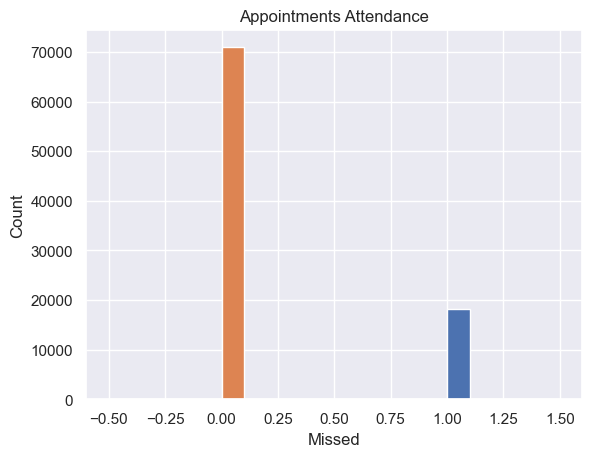

In [75]:
# Comparing patients that missed their appointment and those that did not.
missed = appointments.missed == 1
not_missed = appointments.missed == 0

appointments[missed]['missed'].hist()
appointments[not_missed]['missed'].hist()

label_figure("Appointments Attendance", "Missed", "Count");

Missed - 18269 - (20.479793733535114)
Not Missed - 70936 - (79.52020626646488)


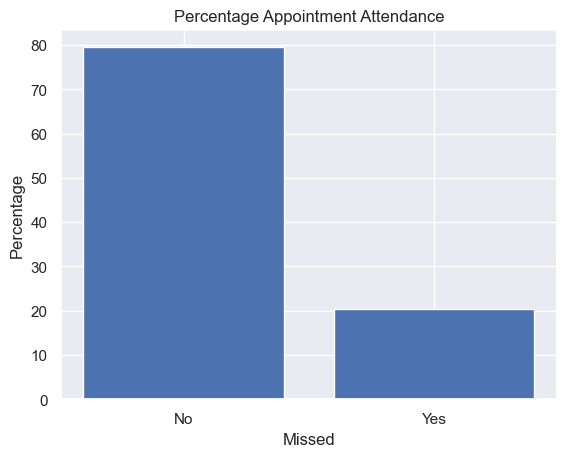

In [76]:
# Comparing in terms of percentage

total_appointments = appointments.shape[0]
total_missed = len(appointments[missed])
total_not_missed = total_appointments - total_missed

percentage_missed = ((total_missed / total_appointments) * 100)
percentage_not_missed = 100 - percentage_missed

print("Missed - {} - ({})".format(total_missed, percentage_missed))
print("Not Missed - {} - ({})".format(total_not_missed, percentage_not_missed))

plt.bar(["No", "Yes"], [percentage_not_missed, percentage_missed])
label_figure("Percentage Appointment Attendance", "Missed", "Percentage");

In [77]:
# Appointments not missed. This would help us further analyse common factors as to
# why these appointments were kept.

appointments_not_missed = appointments[not_missed]
appointments_not_missed.shape

(70936, 15)

<a id="question2"></a>
### Question 2 - What are the common factors for fulfilled appointments?

In [78]:
# Statistical data for appointments not missed

appointments_not_missed.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,waiting_days
count,7.093600e+04,70936.000000,70936.000000,70936.000000,70936.000000,70936.000000,70936.000000,70936.000000,70936.0,70936.000000
mean,1.463761e+14,44.318949,0.094480,0.245292,0.088643,0.032579,0.022090,0.311506,0.0,9.161836
std,2.548614e+14,19.655925,0.292497,0.430263,0.284230,0.177532,0.146978,0.463112,0.0,14.970954
min,3.921784e+04,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.997446e+12,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,3.128532e+13,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.000000
75%,9.397700e+13,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,13.000000
max,9.999686e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,179.000000


In [79]:
# Function to help plot common comparision figure
def plot_figure(data, x, hue):
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=x,hue=hue)

In [80]:
# Function to help calculate percentage
def percentage(proportion, total):
    return (proportion / total) * 100

#### Age

We want to review the impace of a patient's age on fulfilled appointments.

Note - We are using the age 60 because of our observation in the statistical data.

In [81]:
# Grouping the age data based on observation in our statistical data

total = appointments_not_missed.shape[0]
more_than_60 = appointments_not_missed.query('age > 60').shape[0]

print('> 60 years - {0:2f}%'.format(percentage(more_than_60, total)))
print('<= 60 years - {0:2f}%'.format(percentage((total - more_than_60), total)))

> 60 years - 22.854404%
<= 60 years - 77.145596%


#### Gender

We want to review the impact of a patient's gender on fulfilled appointments.

In [82]:
total_female, total_male = appointments['gender'].value_counts()
female, male = appointments_not_missed['gender'].value_counts()

print('Female - {0:2f}%'.format(percentage(female, total_female)))
print('Male - {0:2f}%'.format(percentage(male, total_male)))

Female - 79.456046%
Male - 79.662177%


#### Scholarship

We want to review the impact of a patient having a scholarship (support funds) on fulfilled appointments.

In [83]:
no, yes = appointments_not_missed['scholarship'].value_counts()

print('Scholarship - {0:2f}%'.format(percentage(yes, total)))
print('No Scholarship - {0:2f}%'.format(percentage(no, total)))

Scholarship - 9.447953%
No Scholarship - 90.552047%


#### Hypertension, Diabetes, Alcoholism, Handicap

We want to review the impace of a patient being hypertensive, diabetic, alcoholic or an handicap
on fulfilled appointments.

In [84]:
no, yes = appointments_not_missed['hypertension'].value_counts()

print('Hypertensive - {0:2f}%'.format(percentage(yes, total)))
print('Not Hypertensive - {0:2f}%'.format(percentage(no, total)))

Hypertensive - 24.529153%
Not Hypertensive - 75.470847%


In [85]:
no, yes = appointments_not_missed['diabetes'].value_counts()

print('Diabetic - {0:2f}%'.format(percentage(yes, total)))
print('Not Diabetic - {0:2f}%'.format(percentage(no, total)))

Diabetic - 8.864328%
Not Diabetic - 91.135672%


In [86]:
no, yes = appointments_not_missed['alcoholism'].value_counts()

print('Alcoholic - {0:2f}%'.format(percentage(yes, total)))
print('Not Alcoholic - {0:2f}%'.format(percentage(no, total)))

Alcoholic - 3.257866%
Not Alcoholic - 96.742134%


In [87]:
no, yes = appointments_not_missed['handicap'].value_counts()

print('Handicap - {0:2f}%'.format(percentage(yes, total)))
print('Not Handicap - {0:2f}%'.format(percentage(no, total)))

Handicap - 2.209033%
Not Handicap - 97.790967%


#### SMS Received

We want to review if a patient getting an SMS has an impact on fulfilled appointments.

In [88]:
no, yes = appointments_not_missed['sms_received'].value_counts()

print('SMS - {0:2f}%'.format(percentage(yes, total)))
print('No SMS - {0:2f}%'.format(percentage(no, total)))

SMS - 31.150615%
No SMS - 68.849385%


#### Waiting Days

We want to review if a patient waiting days before appointment impacts it fulfillment.

Note - We are using the number 12 because of our observation in the statistical data.

In [89]:
more_than_12 = appointments_not_missed.query('waiting_days > 12').shape[0]

print('> 12 days - {0:2f}%'.format(percentage(more_than_12, total)))
print('<= 12 days - {0:2f}%'.format(percentage((total - more_than_12), total)))

> 12 days - 25.441243%
<= 12 days - 74.558757%


#### Appointment Day (day of the week)

We want to review if the day of the week the appointment falls impacts whether a patient shows up

In [90]:
appointments_not_missed['appointment_dow'].value_counts()

Wednesday    16817
Tuesday      16658
Monday       14198
Friday       11936
Thursday     11297
Saturday        30
Name: appointment_dow, dtype: int64

Based on the analysis above, we would be considering Age, Waiting Days and Day of the Week in analysing missed appointmets.

<a id="question3"></a>
### Question 3 - Can we use these factors to review patients who miss their appointments?

Yes, we can.

<ul>
    <li>Age</li>
    <li>Waiting Days</li>
    <li>Day of the Week</li>
</ul>

<a id="question4"></a>
### Question 4 - How can we predict whether a patient would miss their appointment?

In [91]:
# Appointments missed. This would help us further analyse using the factors we've established;
# [Age, Waiting Days, Day of the Week]

appointments_missed = appointments[missed].copy()
appointments_missed.shape

(18269, 15)

In [92]:
appointments_missed.describe()

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,missed,waiting_days
count,1.826900e+04,18269.000000,18269.000000,18269.000000,18269.000000,18269.000000,18269.000000,18269.000000,18269.0,18269.000000
mean,1.461790e+14,39.947178,0.116974,0.200339,0.076414,0.035744,0.017461,0.455964,1.0,15.691171
std,2.543314e+14,19.132145,0.321398,0.400265,0.265666,0.185655,0.130986,0.498071,0.0,16.783957
min,5.628261e+06,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,4.252673e+12,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.000000
50%,3.151784e+13,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000
75%,9.452498e+13,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,23.000000
max,9.996585e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,179.000000


#### [Age]

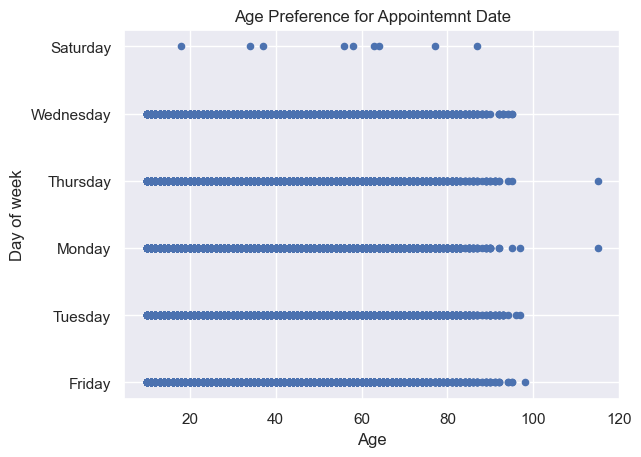

In [93]:
# Reviewing to see if specific appointment days are preferred by
# certain age group.

appointments_missed.plot.scatter(x='age', y='appointment_dow')
label_figure("Age Preference for Appointement Date", "Age", "Day of week");

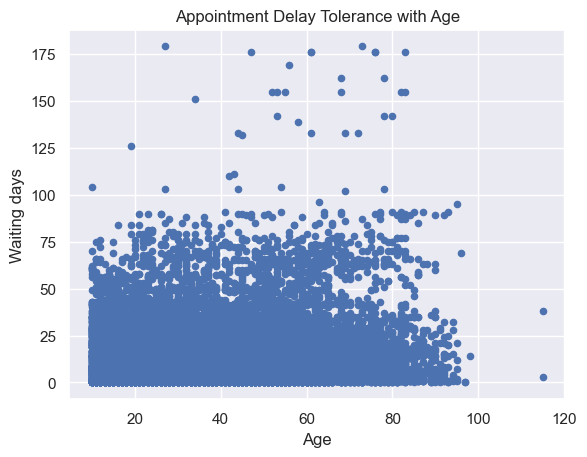

In [96]:
# Reviewing to see if older people have less tolerance for longer waiting days

appointments_missed.plot.scatter(x='age', y='waiting_days')
label_figure("Appointment Delay Tolerance with Age", "Age", "Waiting days");

#### [Waiting Days]

In [97]:
# A function to help group entries [appointments_missed] to two categories
# of appointments with patients who waited 12 days (and below) and more than 12days

def days_group(row):
    if row['waiting_days'] > 12:
        return 'Above 12'
    else:
        return '12 Below'
    
appointments_missed['waiting_days_group'] = appointments_missed.apply(lambda row: days_group(row), axis=1)

In [98]:
appointments_missed['waiting_days_group'].value_counts()

12 Below    9833
Above 12    8436
Name: waiting_days_group, dtype: int64

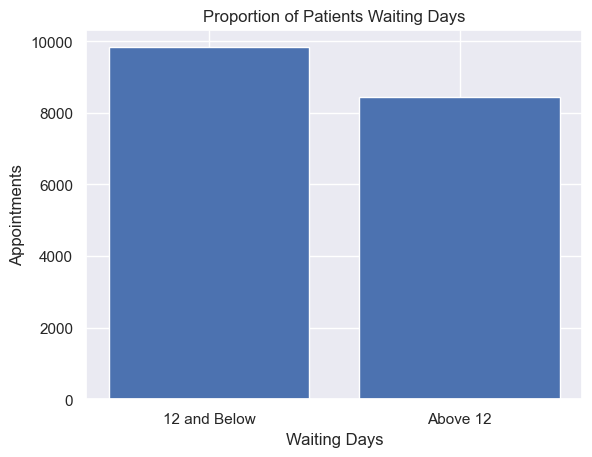

In [99]:
below_12, above_12 = appointments_missed['waiting_days_group'].value_counts()

plt.bar(["12 and Below", "Above 12"], [below_12, above_12])
label_figure("Proportion of Patients Waiting Days", "Waiting Days", "Appointments");

#### [Day of the Week]

In [100]:
appointments_missed['appointment_dow'].value_counts()

Tuesday      4278
Wednesday    4174
Monday       3794
Friday       3238
Thursday     2776
Saturday        9
Name: appointment_dow, dtype: int64

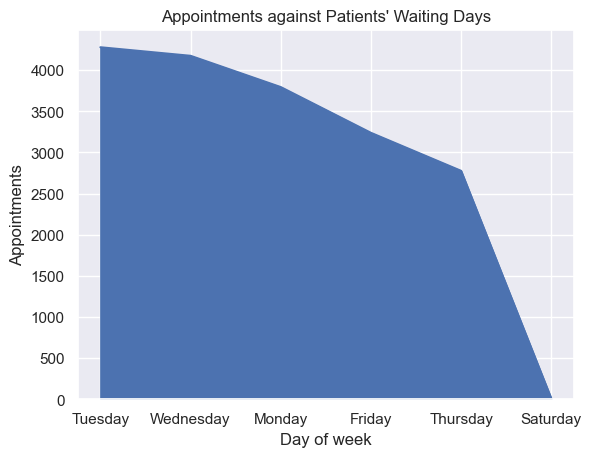

In [101]:
appointments_missed['appointment_dow'].value_counts().plot.area()
label_figure("Appointments against Patients' Waiting Days", "Day of week", "Appointments");

<a id='conclusions'></a>
## Conclusions

Based on the data exploration we've done, we can deduce that

1. Having scholarship or not has no effect over if a patient would miss their appointment.
2. Receiving an SMS is not a push for a patient not to miss their appointment.
3. There's a better chance of a patient showing up for their appointment if they don't have to wait long.
4. Peek appointment days is Tuesday, Wednesday for both missed and attended appointments, with Saturday being the lowest in both cases. This brings up the assumption that there are days most patients would prefer to have their appointment and it is usually crowded.

<a id='limitations'></a>
### Limitations

1. The range of values for different variable in the data is short (it's either True or False).
2. We don't know what role the neighbourhood of the hosptial plays in whether a patient would show up or not.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])